<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras import models, layers, optimizers
from keras.datasets import boston_housing

**Descargamos el data**

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
train_data[0] # caracteristicas de la casa 0

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_labels[0] # precio de la casa 0

15.2

**Vamos a normalizar los datos**

In [12]:
# train data
# media
mean_train_data = train_data.mean(axis=0)
train_data = train_data - mean_train_data

# desviacion estandar
std_train_data = train_data.std(axis=0)
train_data = train_data / std_train_data

# test data
test_data = test_data - mean_train_data
test_data = test_data / std_train_data

In [13]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

**Ahora creamos el modelo**

In [51]:
def build_model_regression(lr_variable, input_data):  
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) # como es un numero continuo lo que necesitamos, es una funcion linear, por ende no necesitamos una capa de activacion

  model.compile(
      optimizer=optimizers.RMSprop(learning_rate = lr_variable),
      loss='mse',
      metrics=[
          'mae'
      ]
  )

  return model

**Sigue iterar sobre nuestros (Fold)**

In [52]:
iterations = 4
num_samples = len(train_data) // iterations
epoch = 100
all_histories = []

In [53]:
for i in range(iterations):
  print('Fold:', i)
  val_data = train_data[i * num_samples : (i + 1) * num_samples]
  val_targets = train_labels[i * num_samples : (i + 1) * num_samples]

  partial_train_data = np.concatenate([
      train_data[:i * num_samples],
      train_data[(i + 1) * num_samples:]
  ], axis=0)

  partial_train_targets = np.concatenate([
      train_labels[:i * num_samples],
      train_labels[(i + 1) * num_samples:]
  ], axis=0)

  model = build_model_regression(0.001, 13)

  history = model.fit(
      partial_train_data,
      partial_train_targets,
      epochs=epoch,
      batch_size=16,
      validation_data=(val_data, val_targets),
      verbose=0
  )

  all_histories.append(history.history['val_mae'])

Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [54]:
all_mea_avg = pd.DataFrame(all_histories).mean(axis=0)

In [55]:
all_mea_avg

0     19.395427
1     15.849135
2     11.552610
3      7.713289
4      5.542169
        ...    
95     2.384604
96     2.279402
97     2.357720
98     2.301739
99     2.314198
Length: 100, dtype: float64

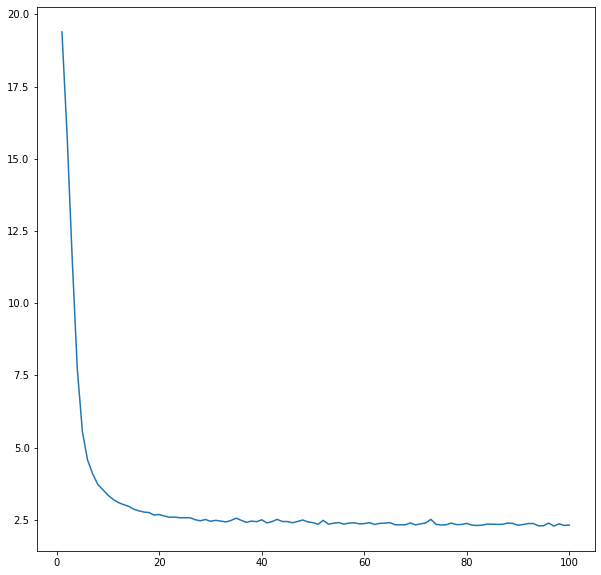

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, len(all_mea_avg) + 1), all_mea_avg)
plt.show()

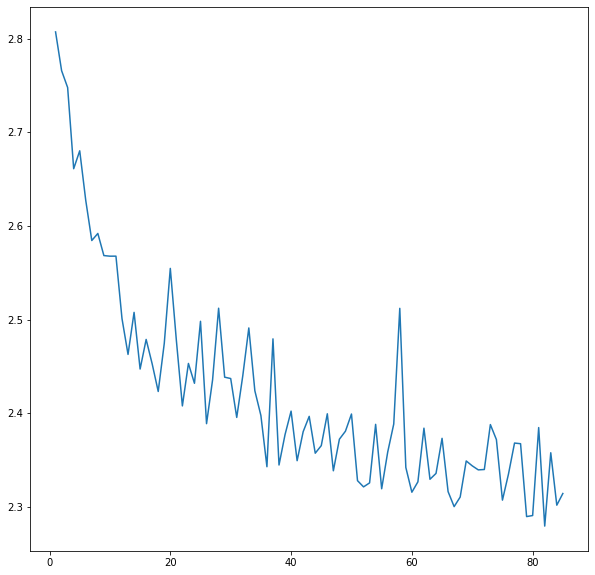

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, len(all_mea_avg[15:]) + 1), all_mea_avg[15:])
plt.show()

In [58]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 17.5879 - mae: 2.6451


[17.58794403076172, 2.645120143890381]